In [1]:
import pandas as pd
import ptitprince as pt
import seaborn as sns
import os
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt

This Python tutorial will follow the footsteps of the R tutorial and guide you in the creation and customization of Raincloud plots.

The Python implementation of Raincloud is a package named PtitPrince, written on the top of seaborn, a Python plotting library written to obtain good-looking plots from pandas dataframes.

By default this tutorial will not save versions of the figures you create, but you can change that in the following cell by changing `savefigs` to `True` and setting the figures directory to whatever you'd prefer.

In [2]:
savefigs = True
figs_dir = '../figs/tutorial_python'

if savefigs:
    # Make the figures folder if it doesn't yet exist
    if not os.path.isdir('../figs/tutorial_python'):
        os.makedirs('../figs/tutorial_python')

As first step, we will load the same dataset used before and visualize the distribution of each measure as a simple barplot:

In [3]:
df = pd.read_csv ("simdat.csv", sep= ",")
df.head()

,Unnamed: 0,group,score,gr2
0,1,Group1,34.318801,high
1,2,Group1,40.113776,high
2,3,Group1,93.387266,high
3,4,Group1,46.235969,high
4,5,Group1,47.537756,high


/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


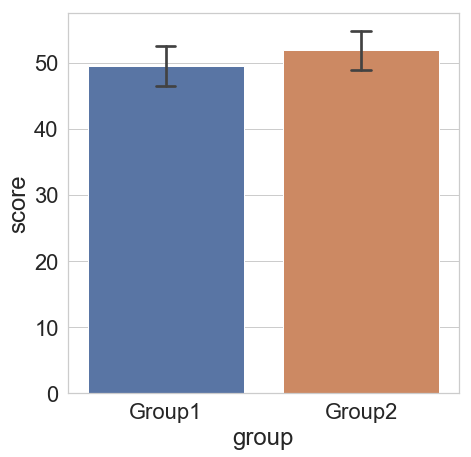

In [4]:
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x = "group", y = "score", data = df, capsize= .1)

In [5]:
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP01.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

This plot can give the reader a first idea of the dataset: which group has bigger mean value, whether this difference is likely to be significant or not.
Only the mean of each group score and the standard deviation is visualized in this plot. 


To have an idea of the distribution of our dataset we can plot a "cloud", a smoothed version of the histogram:

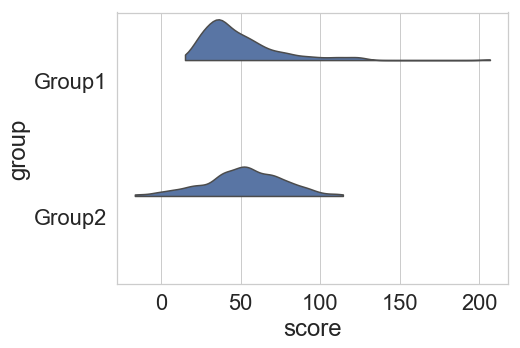

In [6]:
# plotting the clouds
f, ax = plt.subplots(figsize=(7, 5))
dy="group"; dx="score"; ort="h"; pal = sns.color_palette(n_colors=1)

ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP02.png', bbox_inches='tight')

To have a more precise idea of the distribution and illustrate potential outliers or other patterns within the data, we now add the "rain", a simple monodimensional representation of the data points:

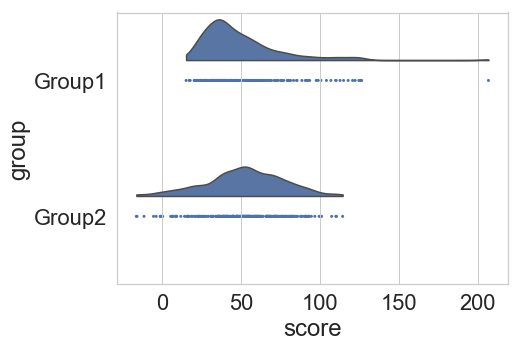

In [7]:
# adding the rain
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                 size = 3, jitter = 0, zorder = 0, orient = ort)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP03.png', bbox_inches='tight')

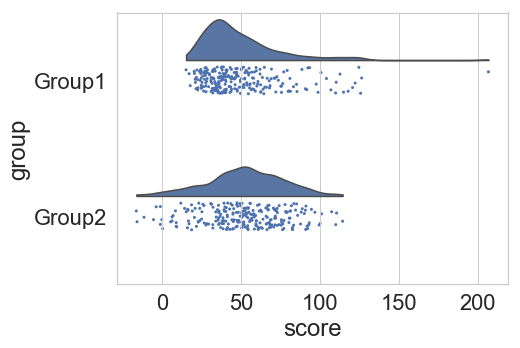

In [8]:
# adding jitter to the rain
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP04.png', bbox_inches='tight')

This gives a good idea of the distribution of the data points, but the median and the quartiles are not obvious, making it hard to determine statistical differences at a glance. Hence we add an "empty" boxplot to show median, quartiles and outliers:

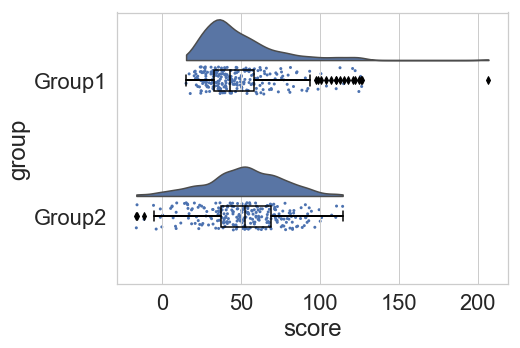

In [9]:
#adding the boxplot with quartiles
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP05.png', bbox_inches='tight')

Now we can set a color palette to characterize the two groups:

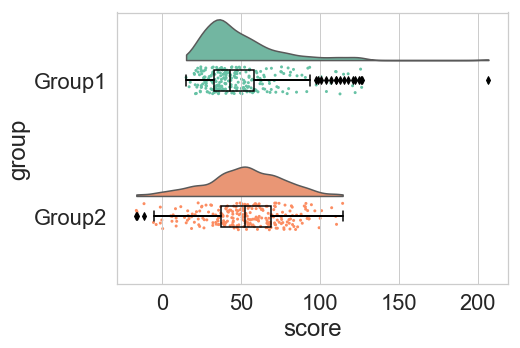

In [10]:
#adding color
pal = "Set2"
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort)

This is a very nice plot, but written in far too many lines! We can use the function `pt.Raincloud` to add some automation:

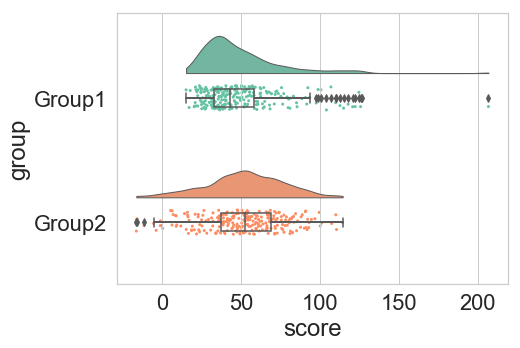

In [11]:
#same thing with a single command: now x **must** be the categorical value
dx = "group"; dy = "score"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .6, figsize = (7,5), orient = ort)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP06.png', bbox_inches='tight')

The 'move' parameter can be used to shift the rain below the boxplot, giving better visibility of the raw data in some instances: 

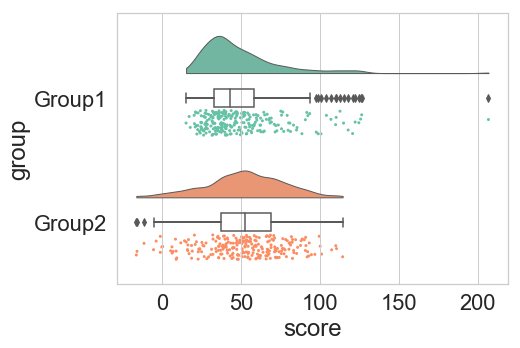

In [12]:
#moving the rain below the boxplot
dx = "group"; dy = "score"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .6, figsize = (7,5), orient = ort, move = .2)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP07.png', bbox_inches='tight')

Further, the raincloud function works equally well with a list or np.array, if you prefer to use those instead of a dataframe input: 

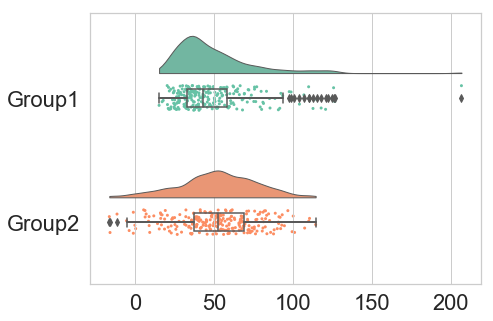

In [13]:
# Usage with a list/np.array input
dx = list(df["group"]); dy = list(df["score"])
ax=pt.RainCloud(x = dx, y = dy, palette = pal, bw = sigma,
                 width_viol = .6, figsize = (7,5), orient = ort)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP08.png', bbox_inches='tight')

For some data, you may want to flip the orientation of the raincloud to a 'petit prince' plot. You can do this with the 'orient' flag in the pt.RainCloud Function:

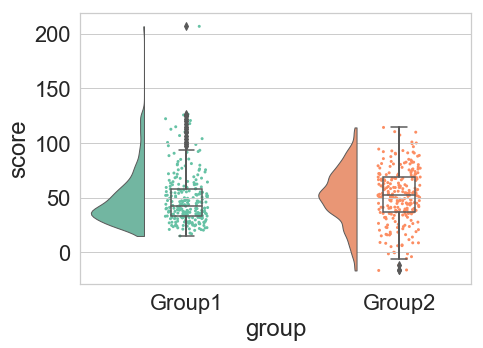

In [14]:
# Changing orientation
dx="group"; dy="score"; ort="v"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .5, figsize = (7,5), orient = ort)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP09.png', bbox_inches='tight')

You can also change the smoothing kernal used to generate the probability distribution function of the data. To do this, you  adjust the sigma parameter: 

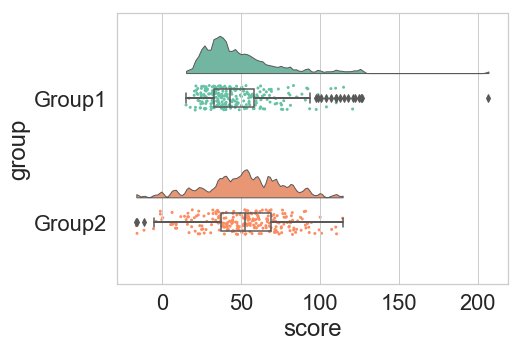

In [15]:
#changing cloud smoothness
dx="group"; dy="score"; ort="h"; pal = "Set2"; sigma = .05
ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .6, figsize = (7,5), orient = ort)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP10.png', bbox_inches='tight')

Finally, using the pointplot flag you can add a line connecting group mean values. This can be useful for more complex datasets, for example repeated measures or factorial data. Below we illustrate a few different approaches to plotting such data using rainclouds, by changing the hue, opacity, or dodge element of the individual plots:  

/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


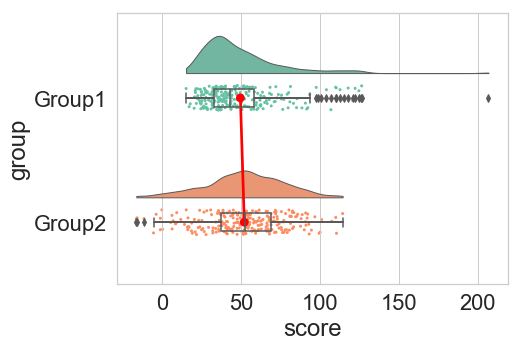

In [16]:
#adding a red line connecting the groups' mean value (useful for longitudinal data)
dx="group"; dy="score"; ort="h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .6, figsize = (7,5), orient = ort,\
               pointplot = True)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP11.png', bbox_inches='tight')

Another flexible option is to use Facet Grids to seperate different groups or factor levels, illustrated below: 

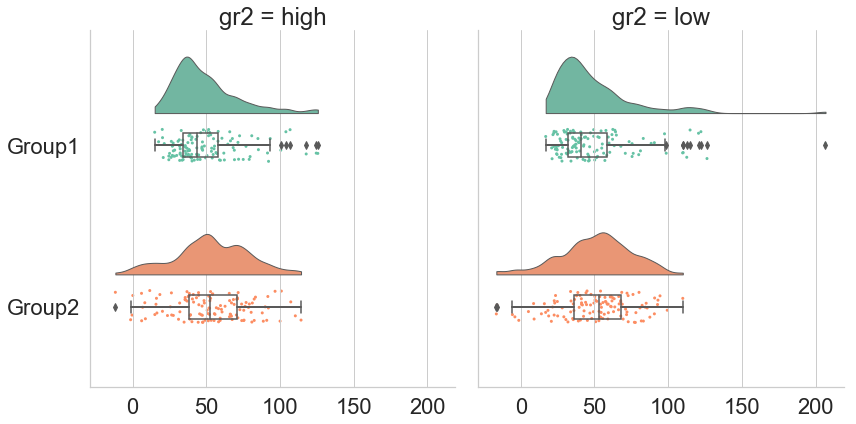

In [17]:
# Rainclouds with FacetGrid
g = sns.FacetGrid(df, col = "gr2", height = 6)
g = g.map_dataframe(pt.RainCloud, x = "group", y = "score", data = df,
                    orient = "h", ax = g.axes)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP12.png', bbox_inches='tight')

As an alternative, it is possible to use the hue input for plotting different sub-groups directly over one another, facilitating their comparison:  

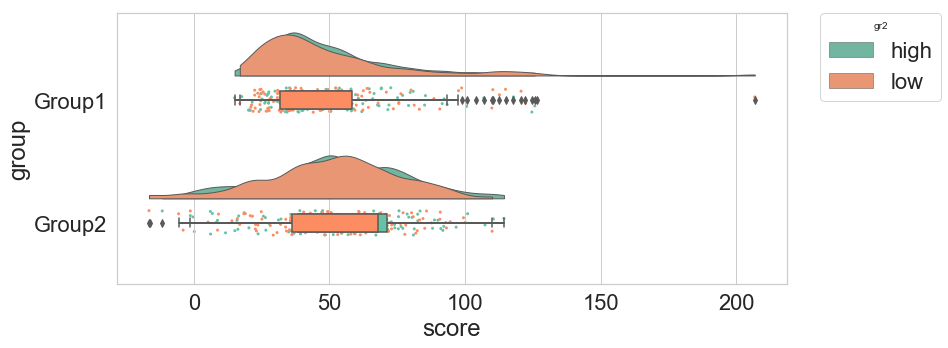

In [18]:
# Hue Input for Subgroups
dx="group"; dy="score"; dhue = "gr2"; ort="h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma,
                 width_viol = .7, figsize = (12,5), orient = ort)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP13.png', bbox_inches='tight')

To improve the readability of this plot, we adjust the alpha-level using the associated flag (0-1 alpha intensity): 

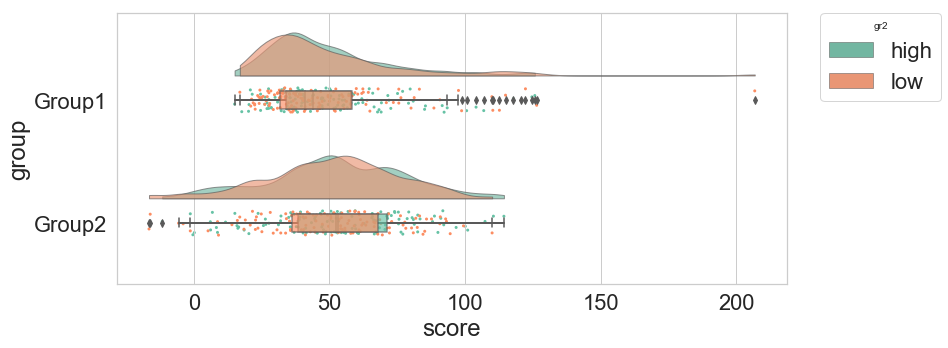

In [19]:
# Setting alpha level
ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma,
                 width_viol = .7, figsize = (12,5), orient = ort , alpha = .65)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP13.png', bbox_inches='tight')

Rather than letting the two boxplots obscure one another, we can set the dodge flag to true, adding interpetability: 

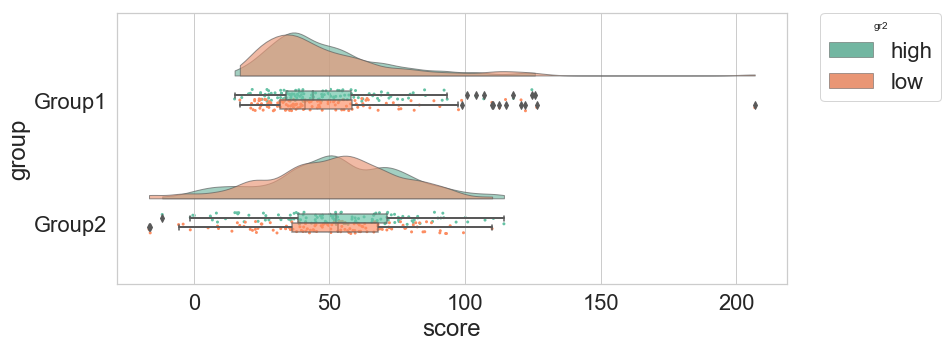

In [20]:
#The Doge Flag
ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma,
                 width_viol = .7, figsize = (12,5), orient = ort , alpha = .65, dodge = True)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP14.png', bbox_inches='tight')

Finally, we may want to add a traditional line-plot to our graph to aid in the detection of factorial main effects and interactions. As an example, we've plotted the mean within each boxplot:

/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


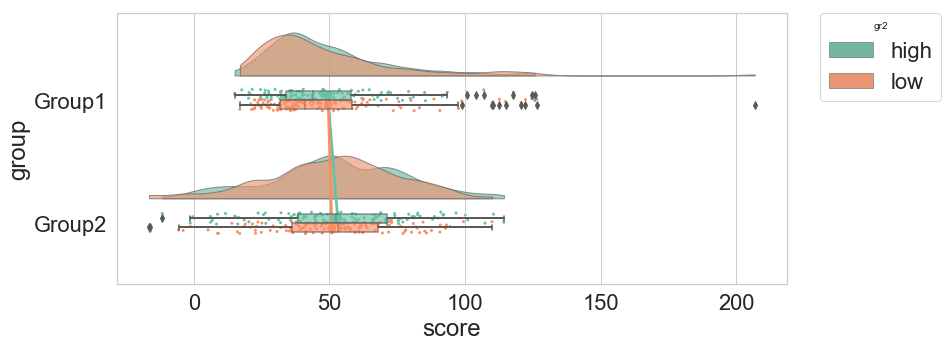

In [21]:
#same, with dodging and line
ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .7,
                figsize = (12,5), orient = ort , alpha = .65, dodge = True, pointplot = True)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP15.png', bbox_inches='tight')

Here is the same plot, but now with the individual observatiosn moved below the boxplots again using the 'move' parameter:

/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


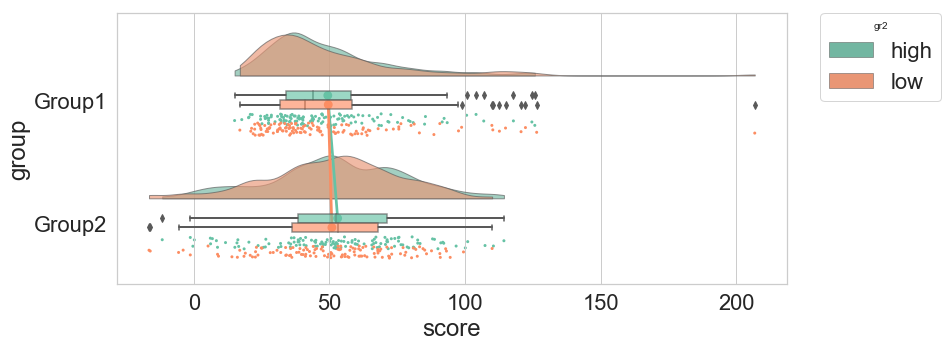

In [22]:
#moving the rain under the boxplot 
ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .7,
                figsize = (12,5), orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP16.png', bbox_inches='tight')

As our last example, we'll consider a complex repeated measures design with two groups and three timepoints. The goal is to illustrate our complex interactions and main-effects, while perserving the transparent nature of the raincloud plot: 

In [23]:
# Load in the repeated data
df_rep = pd.read_csv ("repeated_measures_data.csv", sep= ",")
df_rep.columns = ["score",  "timepoint", "group"]
df_rep.head()

,score,timepoint,group
0,5.57,1,1
1,7.43,1,1
2,4.37,1,1
3,8.22,1,1
4,8.17,1,1


/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


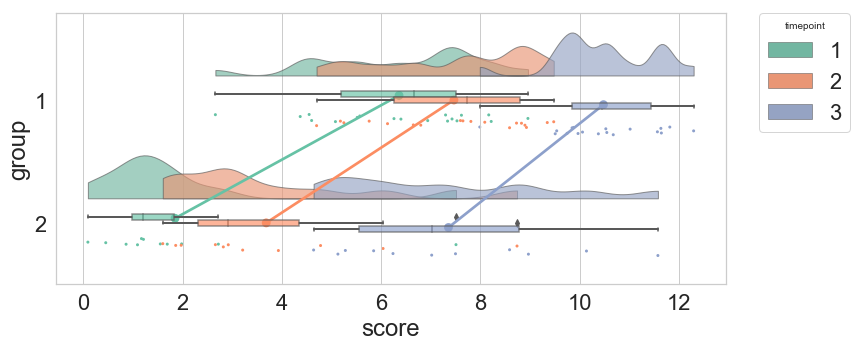

In [24]:
# Plot the repeated measures data
dx = "group"; dy = "score"; dhue = "timepoint"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df_rep, palette = pal, bw = sigma, width_viol = .7,
                figsize = (12,5), orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP17.png', bbox_inches='tight')

The function is flexible enough that you can flip the ordering of the factors around simply by changing which variable informs the hue parameter: 

/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


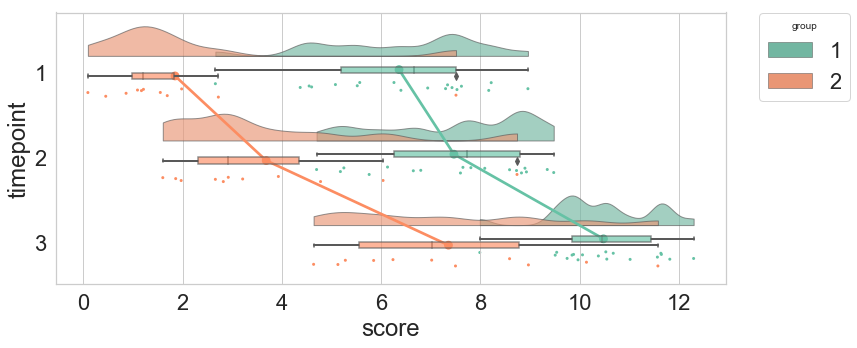

In [25]:
# Now with the group as hue
dx = "timepoint"; dy = "score"; dhue = "group"
ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df_rep, palette = pal, bw = sigma, width_viol = .7,
                figsize = (12,5), orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP18.png', bbox_inches='tight')

That's it! Hopefully this tutorial has given you an idea of some of the different ways you can produce raincloud plots in Python.